In [1]:
import tensorflow as tf 
from tensorflow.keras.models import load_model 
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np 
import os
from pathlib import Path



In [2]:
data_dir = Path("Data")


test_dir = os.path.join(data_dir, 'prediction')

In [3]:
# Paramètres
img_height, img_width = 224, 224  # Taille des images (à adapter selon votre besoin)


In [4]:
# Helper function to preprocess images
def preprocess_image(image_path):
    # Load the image with the target size
    img = load_img(image_path, target_size=(img_height, img_width))
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    # Normalize the image (values between 0 and 1)
    img_array = img_array / 255.0
    # Expand dimensions to match model input shape (1, IMG_HEIGHT, IMG_WIDTH, 3)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [5]:
model = load_model('model2.h5')

In [6]:
# Predict all images in the test directory
predictions = {}
for image_name in os.listdir(test_dir):
    image_path = os.path.join(test_dir, image_name)
    if os.path.isfile(image_path):  # Vérifiez que c'est bien un fichier
        # Preprocess the image
        img_array = preprocess_image(image_path)
        # Predict using the model
        prediction = model.predict(img_array)
        print(f"Prédiction brute pour {image_name}: {prediction}")
        predicted_class = 1 if prediction[0] > 0.5 else 0  # Seuil de 0.5 pour une classification binaire
        predictions[image_name] = predicted_class



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Prédiction brute pour F_1.jpg: [[0.99094963]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prédiction brute pour F_12.jpg: [[0.95965546]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prédiction brute pour F_15.jpg: [[0.9967344]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prédiction brute pour F_16.jpg: [[0.99866045]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prédiction brute pour F_22.jpg: [[0.9999947]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prédiction brute pour F_8.jpg: [[0.6939579]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prédiction brute pour NF_0.jpg: [[0.05077023]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prédiction brute pour NF_10.jpg: [[5.6949566e-06]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prédiction brute pour NF_17.jpg: [[0.81837106]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prédiction brute pour NF_18.jpg: [[6.532167e-09]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prédiction brute pour NF_23.jpg: [[0.0001035]]


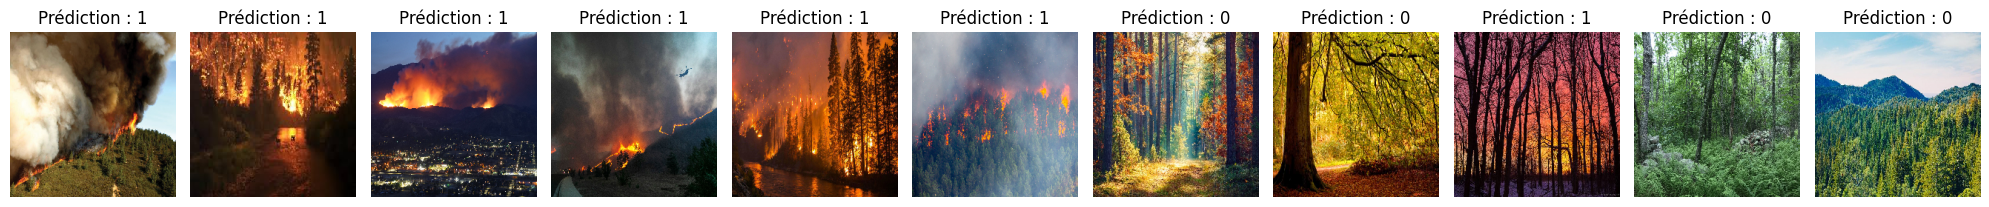

In [7]:
import matplotlib.pyplot as plt 

# Affichage des prédictions et des images
fig, axes = plt.subplots(1, len(predictions), figsize=(20, 5))
if len(predictions) == 1:
    axes = [axes]  # Gérer le cas avec une seule image

for ax, (image_name, predicted_class) in zip(axes, predictions.items()):
    image_path = os.path.join(test_dir, image_name)
    img = load_img(image_path, target_size=(img_height, img_width))
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Prédiction : {predicted_class}")

plt.tight_layout()
plt.show()


### faire la prediction de toute les images test 

In [22]:

# Dossier contenant les données de test
data_dir1 = r".\Data\Test_Data"


In [23]:
# Charger les images de test et leurs labels
true_labels = []
predicted_labels = []

In [24]:
# Parcourir les dossiers _Fire et Non_Fire dans le dossier test_data
for class_name in ['_Fire', 'Non_Fire']:
    class_dir = os.path.join(data_dir1, class_name)  # Crée le chemin complet du dossier de la classe
    class_label = 1 if class_name == '_Fire' else 0  # 1 pour _Fire, 0 pour Non_Fire

    # Vérifier si le dossier de la classe existe
    if not os.path.exists(class_dir):
        print(f"Le dossier {class_dir} n'existe pas. Vérifiez le chemin.")
        continue  # Passer à la prochaine classe si le dossier n'existe pas

    # Parcourir les images dans le dossier de la classe
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        
        # Vérifier si c'est bien un fichier d'image
        if os.path.isfile(image_path):
            # Prétraiter l'image
            img_array = preprocess_image(image_path)
            
            # Prédire avec le modèle
            prediction = model.predict(img_array)
            predicted_class = 1 if prediction[0] > 0.5 else 0  # Seuil de 0.5 pour déterminer la classe

            # Ajouter les résultats aux listes
            true_labels.append(class_label)
            predicted_labels.append(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Calculer les métriques statistiques
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

In [27]:
# Afficher les résultats
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9184
Precision: 0.9545
Recall: 0.8750
F1 Score: 0.9130


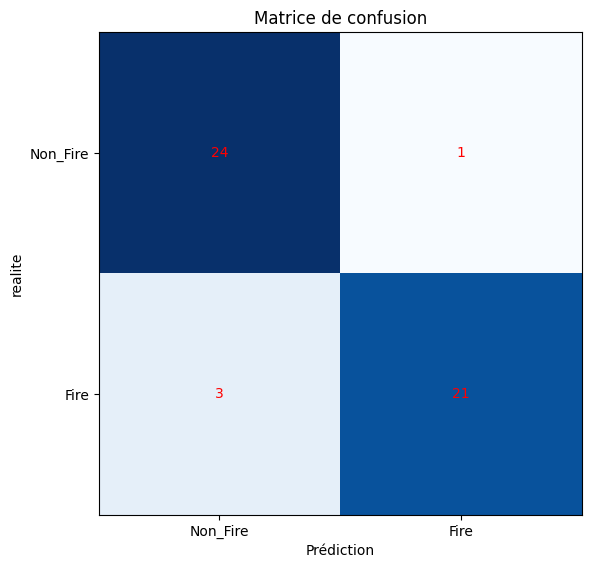

In [29]:
# Afficher la matrice de confusion
cm = confusion_matrix(true_labels, predicted_labels)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title("Matrice de confusion")
ax.set_xlabel("Prédiction")
ax.set_ylabel("realite")
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(["Non_Fire", "Fire"])
ax.set_yticklabels(["Non_Fire", "Fire"])

# Afficher les valeurs dans la matrice
for i in range(2):
    for j in range(2):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", color="red")

plt.tight_layout()
plt.show()